# Testing somethings

## This is smaller
#### Smaller...

I am writing a longer text <br>
I want a line shift  
Is that *possible* or **what**  
Why

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline

# Set style of plots
ticksize= 12
titlesize = 18
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
# mpl.interactive(True)


mpl.rcParams.update({'axes.formatter.useoffset':False})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

# mpl.rcParams.update({'axes.formatter.style':'plain'})

# mpl.rcParams.update({'font.family':'sans-serif'})
# mpl.rcParams.update({'font.serif':'Helvetica'})
# mpl.rcParams.update({'font.sans-serif':'Helvetica'})


# mpl.rcParams.keys()

#font.family         : sans-serif
#font.style          : normal
#font.variant        : normal
#font.weight         : medium
#font.stretch        : normal
#font.serif          : DejaVu Serif, Bitstream Vera Serif, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif
#font.sans-serif     : DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
#font.cursive        : Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, cursive
#font.fantasy        : Comic Sans MS, Chicago, Charcoal, Impact, Western, Humor Sans, xkcd, fantasy
#font.monospace      : DejaVu Sans Mono, Bitstream Vera Sans Mono, Andale Mono, Nimbus Mono L, Courier New, Courier, Fixed, Terminal, monospace
#mathtext.cal : cursive
#mathtext.rm  : serif
#mathtext.tt  : monospace
#mathtext.it  : serif:italic
#mathtext.bf  : serif:bold
#mathtext.sf  : sans
#mathtext.fontset : dejavusans # Should be 'dejavusans' (default),
                               # 'dejavuserif', 'cm' (Computer Modern), 'stix',
                               # 'stixsans' or 'custom'
def sci_not(num,dec):
    exp = int(np.log10(num)+100)-100
    sci = (r"$%.10f"%(num/10**exp))[:dec+2+1*(dec>0)]+r"\cdot10^{%d}$"%exp
    return sci

# print(mpl.rcParams.keys())

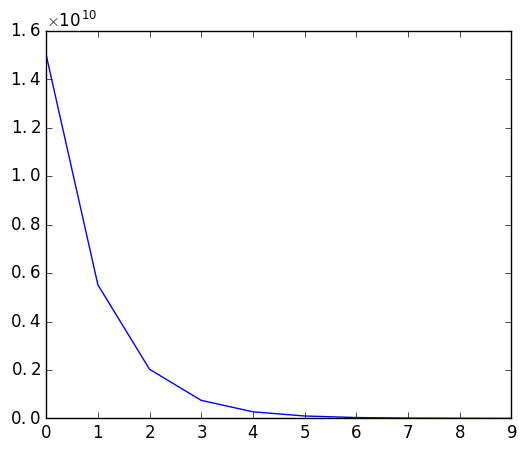

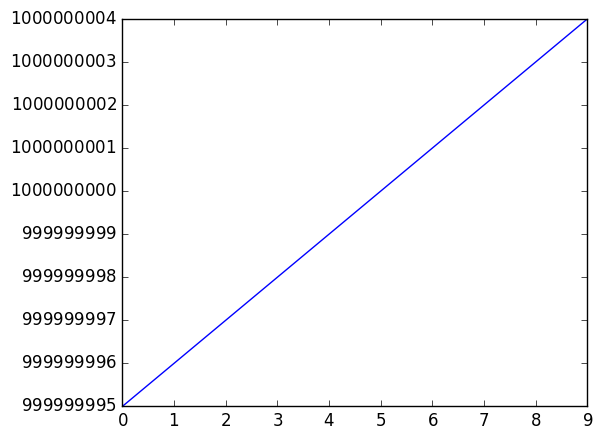

In [2]:
x = np.arange(10)
y = 1.5e10*np.exp(-x)
plt.plot(x,y)

plt.figure()
y = 1e9+x-5
plt.plot(x,y)
plt.ticklabel_format(style='plain')

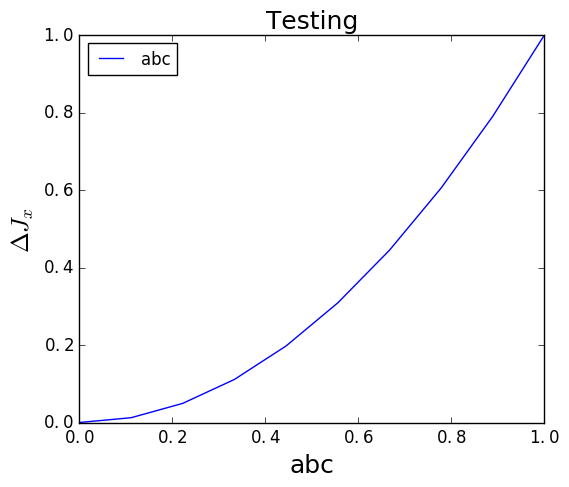

In [3]:
x= np.linspace(0,1,10)
y = x**2
plt.figure()
plt.plot(x,y,label='abc')
plt.xlabel('abc')
plt.legend(loc=0)
plt.ylabel(r'$\Delta J_x$')
plt.title('Testing')

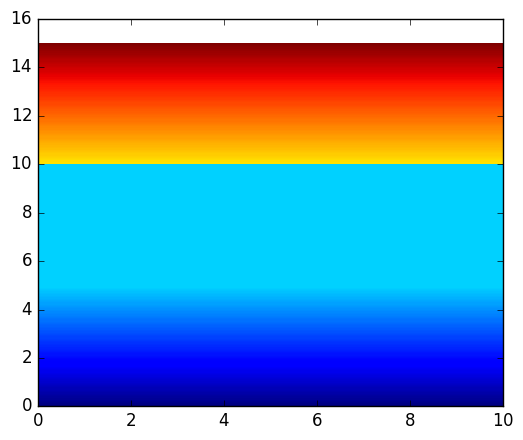

In [4]:
########################################################
################ PCOLOR ################################
########################################################
jx = np.linspace(0,10,200)
jy = jx
JX,JY = np.meshgrid(jx,jy)
JY[JY>5]+=5

F = JY
vmin = np.min(F)
vmax = np.max(F)
plt.figure()
plt.pcolor(JX,JY,F,vmin=vmin,vmax=vmax)

0.998532547644


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in true_divide


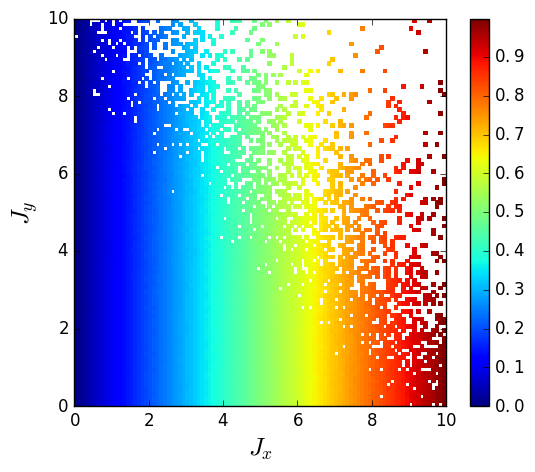

In [5]:
###################################################################
################ PCOLOR with NANS #################################
###################################################################
N = int(1e5)
jx = st.chi2.rvs(2,size=N)
jy = st.chi2.rvs(2,size=N)

ymax=xmax=10
nbin2 = 100
H1,xedges,yedges = np.histogram2d(jx,jy,nbin2,range=[[0,xmax],[0,ymax]]);
H1=H1.transpose()
jy2 =jy.copy()
jx2 =jx.copy()
jx2*=1.1

H2,xedges,yedges = np.histogram2d(jx2,jy2,nbin2,range=[[0,xmax],[0,ymax]]);
H2=H2.transpose()

DJx = jx2-jx
H3,xedges,yedges = np.histogram2d(jx,jy,nbin2,range=[[0,xmax],[0,ymax]],weights=DJx);
H3=H3.transpose()

X,Y = np.meshgrid(xedges,yedges)
F = H3/H1 # (H2-H1)/H1

F = np.ma.masked_where(np.isnan(F), F)


vmax =np.nanmax(np.abs(F))
vmin=0
print(vmax)
plt.figure()
plt.pcolor(X,Y,F,vmin=vmin,vmax=vmax)
plt.colorbar()
plt.xlabel(r'$J_x$')
plt.ylabel(r'$J_y$')




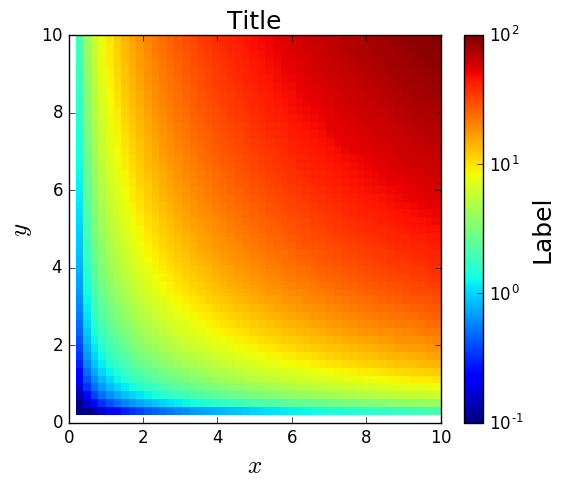

In [6]:
###################################################################
################ PCOLOR with LOGscale #############################
###################################################################
a= 1e-4
b= -a
# a = 1.64e-4  ;  b = -1.16e-4
# a = 2*a
g= 0.02
jmax= 10
jx = np.linspace(0,jmax,50)
jy = jx
JX,JY = np.meshgrid(jx,jy)

F = JX*JY
vmin = np.min(F)
vmax = np.max(F) 
vmin = 10**(int(np.log10(vmax * 1e4)-7))

plt.figure()
plt.pcolor(JX,JY,F,norm =LogNorm(vmin=vmin,vmax=vmax))
plt.colorbar(label=r'Label')
plt.title('Title')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# plt.savefig("03_Plots/DACTX_JxJy_a=%.0e_b=%.0e_g=%.0e.eps"%(a,b,g))

# Twinx Plotting

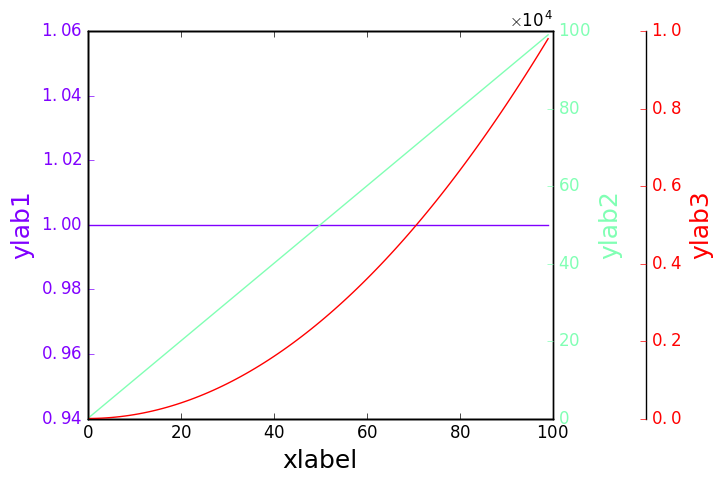

In [7]:
fig = plt.figure(1)
ax0 = fig.add_subplot(111)


N = 100
x = np.arange(N)

xlabel='xlabel'
NAMES=['ylab1','ylab2','ylab3']

for i,name in enumerate(NAMES):
    xlab = xlabel
    ylab = NAMES[i]
    y = x**i
    c = cm.rainbow((i)/(len(NAMES)-1))
    ax =ax0
    if i>0:
        ax = ax0.twinx()
        if i>1:
            ax.spines['right'].set_position(('axes', 1.+0.1*i))
    
    ax.tick_params('y', colors=c)
    ax.plot(x,y,c=c)
    
    ax.set_ylabel(ylab,color=c)
    ax.set_xlabel(xlab)
    

# Bar plot

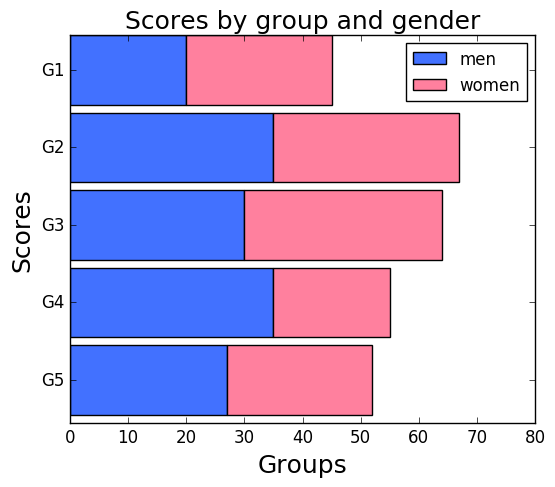

In [24]:
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
height = 0.9       # the width of the bars: can also be len(x) sequence

c1 = (0.2588,0.4433,1.0)
c2 = (1.0,0.5,0.62)
p1 = ax.barh(ind,menMeans,   height, color=c1,label = 'men')
p2 = ax.barh(ind,womenMeans,  height, color=c2,left=menMeans,label='women')
ax.set_ylabel('Scores')
ax.set_xlabel('Groups')
ax.set_title('Scores by group and gender')

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_yticks(ind + height/2.)
ax.set_xticks(np.arange(0, 81, 10))
ax.set_yticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

plt.legend()

## colorbar as time scale

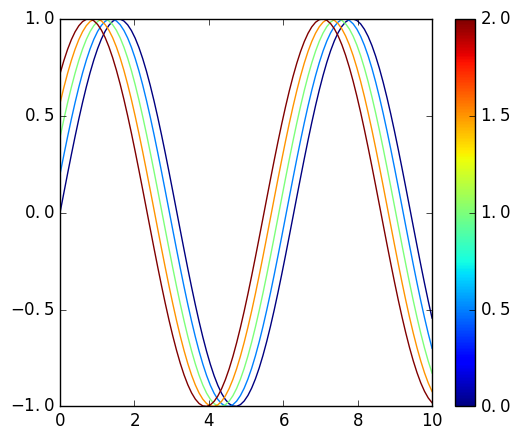

In [17]:
n_lines = 5
x = np.linspace(0, 10, 100)
t = np.linspace(0,2, n_lines)
c = t

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

fig, ax = plt.subplots(dpi=100)
for i in range(n_lines):
    y = np.sin(x+0.2*i)
    ax.plot(x, y, c=cmap.to_rgba(c[i]))
fig.colorbar(cmap, ticks=c)

# Animation

In [54]:
# See PhysicsForFun DoublePendulum

# Candidacy exam

[  2.40482556   5.52007811   8.65372791  11.79153444  14.93091771
  18.07106397  21.21163663  24.35247153  27.49347913  30.63460647]


([<matplotlib.axis.YTick at 0x7f10312042b0>],
 <a list of 1 Text yticklabel objects>)

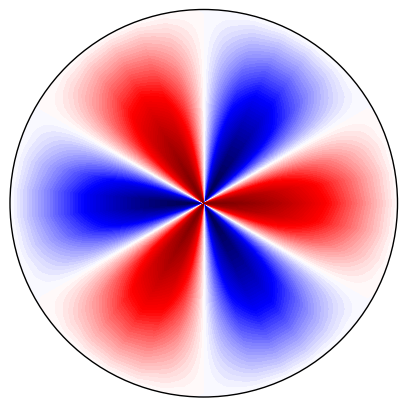

In [116]:
import scipy.special as spec

nulls=spec.jn_zeros(0,10)
print(nulls)
Nr=40
Na=40
r = np.linspace(0,1,Nr)
phi = np.linspace(0,2*np.pi,Na)
# plt.plot(r,spec.jv(0,r*nulls[mr]))



R,PHI = np.meshgrid(r,phi)
mr = 0
ma = 3

F = spec.jv(0,R*nulls[mr]) * np.cos(PHI*ma)

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(PHI, R, F,100,cmap='seismic',vmin=-1,vmax=1)
plt.xticks([0,np.pi/2],['x','p'])
plt.xticks([],[])
plt.yticks([0],[''])
# plt.axvline(linewidth=0.5, color = 'k')
# plt.axhline(linewidth=0.5, color = 'k')


# plt.polar(R,)

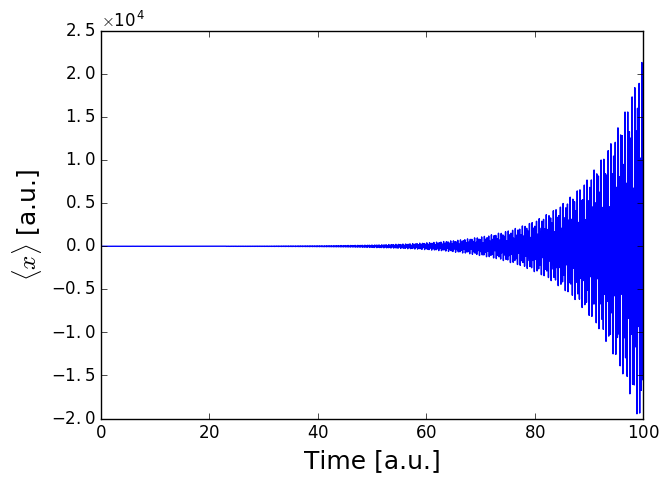

In [126]:
t = np.linspace(0,10,1000)
T=1
y = np.sin(2*np.pi*61.31*t)*np.exp(t/T)
plt.figure(figsize=(7,5))
plt.plot(x,y)
plt.ylabel(r'$\langle x\rangle$ [a.u.]')
plt.xlabel('Time [a.u.]')